In [9]:
from pathlib import Path
import cantera as ct
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import numpy as np


In [21]:
# Set up the Cantera flame configuration
#gas = ct.Solution('gri30.yaml')  # Replace 'your_mechanism.cti' with the actual mechanism file
gas = ct.Solution('Jerzembeck.yaml')
phi = 0.75
P = 1.0 * ct.one_atm
Tin = 300.0
width = 0.02  # Adjust the domain width as needed
initial_grid = np.linspace(0, width, 100)

# Create a stoichiometric CH4/Air premixed mixture
#gas.set_equivalence_ratio(phi, "CH4", {"O2": 1.0, "N2": 3.76})
gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:12.5, N2:47')
gas.TP = Tin, P
flame = ct.FreeFlame(gas, grid=initial_grid)


# Run the flame simulation
flame.solve(loglevel=1, auto=True)


*********** Solving on 100 point grid with energy equation enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.328e-06      6.549
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.136e-05      6.406
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.604e-05      6.404
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.406e-05      6.006
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002737      4.982
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001299      5.028
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00111      4.299
Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] poi

In [22]:
time_scale = np.zeros(len(flame.grid))
#time_scale = []
# Calculate the time scale
def calculate_time_scale(grid, velocity):
     
    for j in range(1,len(flame.grid)-1):
        delta_x = (grid[j+1]-grid[j-1])/2
        vel = velocity[j]
        time_scale[j] = delta_x/vel
        #time_scale.append(delta_x/vel)
    return time_scale

velocity = flame.velocity
grid = flame.grid
time_scale = calculate_time_scale(flame.grid, velocity)
time_scale[0] = (grid[0]-grid[1])/velocity[0]
time_scale[-1] = (grid[-2]-grid[-1])/velocity[-1]
#length_flame = len(flame.grid)
#print(np.diff(flame.grid))
#print(len(time_scale))

new_grid = np.zeros(len(flame.grid))
i = 1
for i in range(1,len(flame.grid)):
    new_grid[i] = flame.grid[i]- flame.grid[i-1]
    time_scale[i] = new_grid[i]/velocity[i]
# Find the position of maximum heat release
max_heat_release_idx = np.argmax(flame.heat_release_rate)
max_heat_release = flame.heat_release_rate
print(max_heat_release_idx)
# to store the changed time scale t = 0 at maximum heat release
actual_time_scale = np.zeros(len(time_scale))
i = 1
for i in range(41,len(time_scale)):
    actual_time_scale[40] =  0
    actual_time_scale[i] =  time_scale[i] + actual_time_scale[i-1]
for i in range(39,-1,-1):
    actual_time_scale[40] =  0
    actual_time_scale[i] =  actual_time_scale[i+1] - time_scale[i]

48


In [98]:
print(flame.T)

[ 600.          600.          600.          600.          600.
  600.          600.          600.          600.          600.
  600.          600.          600.          599.99999999  599.99999999
  599.99999999  599.99999999  599.99999999  599.99999999  599.99999999
  599.99999999  599.99999999  599.99999999  599.99999999  599.99999999
  599.99999999  599.99999999  600.00000008  600.00000142  600.00002359
  600.00039036  600.00645645  600.10676984  601.76284657  612.12731754
  646.1429701   707.16156187  773.37278593  823.98299646  890.55681034
  975.81656101 1081.74598278 1209.04455385 1280.48043978 1356.38822004
 1435.09965787 1513.63423421 1587.75737539 1653.22883548 1707.51438548
 1750.69997318 1810.4377899  1851.21747197 1880.9661911  1918.79738634
 1952.88738208 1973.03945191 1980.28445672 1984.19204268 1985.43091073
 1985.92366841 1986.02082318 1986.03891098 1986.04112391 1986.04014338
 1986.0385121  1986.03674089 1986.0349337  1986.03311284 1986.031284
 1986.02944933 1986.0276

In [24]:
for i, specie in enumerate(gas.species()):
    print(f"{i}. {specie}")

0. <Species N2>
1. <Species AR>
2. <Species O>
3. <Species O2>
4. <Species H2>
5. <Species H>
6. <Species OH>
7. <Species H2O2>
8. <Species H2O>
9. <Species HO2>
10. <Species HCO>
11. <Species CH2>
12. <Species CO>
13. <Species CH2O>
14. <Species CO2>
15. <Species CH3>
16. <Species CH4>
17. <Species C2H4>
18. <Species CH3OH>
19. <Species C2H5>
20. <Species C2H6>
21. <Species CH3O>
22. <Species HOCHO>
23. <Species CH3O2>
24. <Species CH3O2H>
25. <Species C2H2>
26. <Species CH2CO>
27. <Species C3H4XA>
28. <Species C3H4XP>
29. <Species C3H5XA>
30. <Species C2H3>
31. <Species CH3CHO>
32. <Species C2H5O2>
33. <Species C3H3>
34. <Species C3H6>
35. <Species C2H3CHO>
36. <Species CH3COCH2>
37. <Species NXC3H7>
38. <Species C3H8>
39. <Species CH3COCH3>
40. <Species IXC3H7O2>
41. <Species NXC3H7O2>
42. <Species C4H6>
43. <Species C4H8X1>
44. <Species IXC4H7>
45. <Species IXC4H8>
46. <Species IXC3H5CHO>
47. <Species IXC3H6CO>
48. <Species IXC4H10>
49. <Species C4H10>
50. <Species IXC3H5CO>
51. <S

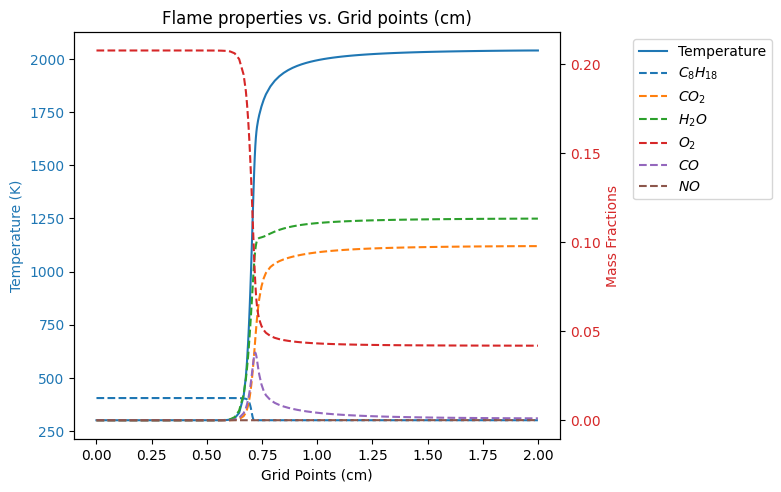

In [25]:
# Extract concentration data
X_C8H18 = flame.X[63]
X_O2 = flame.X[3]
X_CO = flame.X[12]
X_NO = flame.X[104]
X_CO2 = flame.X[14]
X_H2O = flame.X[8]

'''
plt.figure()

plt.plot(flame.grid * 100, X_C8H18, label="$C_{8}H_{18}$")
plt.plot(flame.grid * 100, X_CO2, label="$CO_{2}$")
plt.plot(flame.grid * 100, X_H2O, label="$H_{2}O$")
plt.plot(flame.grid * 100, X_O2, label="$O_{2}$")
plt.plot(flame.grid * 100, X_CO, label="$CO$")
plt.plot(flame.grid * 100, X_NO, label="$NO$")

plt.legend(loc=2, bbox_to_anchor=(1, 1))
plt.xlabel("Distance (cm)")
plt.ylabel("MoleFractions");
'''
fig, ax1 = plt.subplots()

ax1.set_xlabel('Grid Points (cm)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.plot(flame.grid * 100, flame.T,label="Temperature")

ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mass Fractions', color='tab:red')
plt.plot(flame.grid * 100, X_C8H18, label="$C_{8}H_{18}$",linestyle = '--')
plt.plot(flame.grid * 100, X_CO2, label="$CO_{2}$",linestyle = '--')
plt.plot(flame.grid * 100, X_H2O, label="$H_{2}O$",linestyle = '--')
plt.plot(flame.grid * 100, X_O2, label="$O_{2}$",linestyle = '--')
plt.plot(flame.grid * 100, X_CO, label="$CO$",linestyle = '--')
plt.plot(flame.grid * 100, X_NO, label="$NO$",linestyle = '--')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Add legends
lines1, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.45, 1))


plt.title('Flame properties vs. Grid points (cm)')
plt.show()

(0.0, 0.8)

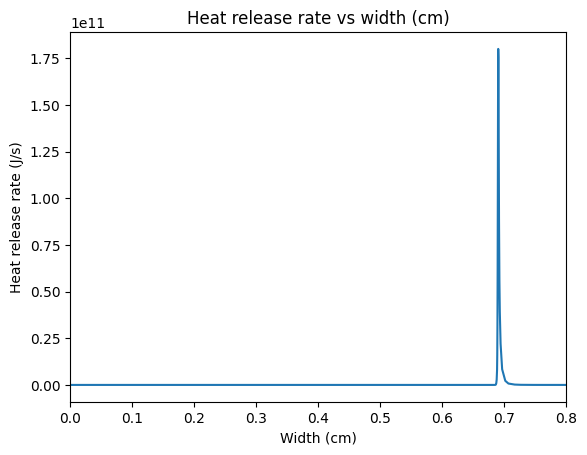

In [108]:
plt.plot(flame.grid * 100, flame.heat_release_rate,label="Temperature")
plt.title('Heat release rate vs width (cm)')
plt.xlabel('Width (cm)')
plt.ylabel('Heat release rate (J/s)')
plt.xlim([0, 0.8])

In [26]:
'''
plt.figure(3)
plt.plot(actual_time_scale, flame.T, "-o")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)");

# Create a plot

plt.plot(mixture_fraction_points[0], flame_temp[0][0],label = 'Vel of air - 0.1 m/s')
plt.plot(mixture_fraction_points[1], flame_temp[1][0],label = 'Vel of air - 2.0 m/s')
plt.plot(mixture_fraction_points[2], flame_temp[2][0],label = 'Vel of air - 3.3 m/s')

# Add labels to the axes and a title
plt.xlabel('Mixture fraction (Z)')
plt.ylabel('Temperature (K)')
plt.title('Diffusion Flame Temperature vs. Mixture fraction')
plt.legend(loc='upper right')
ax1.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.6, 1))
# Enable the minor grid
plt.minorticks_on()
plt.grid(True)

# Display the plot (you may not need this in some Python environments)
plt.show()

fig, ax1 = plt.subplots()

ax1.set_xlabel('Mixture fraction (Z)')
ax1.set_ylabel('Mass Fractions_O2', color='tab:blue')
ax1.plot(mixture_fraction_points[0], YO2_values[0], label='O2_Vel of air - 0.1 m/s')
ax1.plot(mixture_fraction_points[1], YO2_values[1], label='O2_Vel of air - 2.0 m/s')
ax1.plot(mixture_fraction_points[2], YO2_values[2], label='O2_Vel of air - 3.3 m/s')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mass Fractions_C8H18', color='tab:red')
ax2.plot(mixture_fraction_points[0], YC8H18_values[0], label='C8H18_Vel of air - 0.1 m/s',linestyle = '--')
ax2.plot(mixture_fraction_points[1], YC8H18_values[1], label='C8H18_Vel of air - 2.0 m/s',linestyle = '--')
ax2.plot(mixture_fraction_points[2], YC8H18_values[2], label='C8H18_Vel of air - 3.3 m/s',linestyle = '--')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.6, 1))

plt.title('Mass fractions of Species vs. Mixture fraction (Z)')
plt.show()
'''

'\nplt.figure(3)\nplt.plot(actual_time_scale, flame.T, "-o")\nplt.xlabel("Time (s)")\nplt.ylabel("Temperature (K)");\n\n# Create a plot\n\nplt.plot(mixture_fraction_points[0], flame_temp[0][0],label = \'Vel of air - 0.1 m/s\')\nplt.plot(mixture_fraction_points[1], flame_temp[1][0],label = \'Vel of air - 2.0 m/s\')\nplt.plot(mixture_fraction_points[2], flame_temp[2][0],label = \'Vel of air - 3.3 m/s\')\n\n# Add labels to the axes and a title\nplt.xlabel(\'Mixture fraction (Z)\')\nplt.ylabel(\'Temperature (K)\')\nplt.title(\'Diffusion Flame Temperature vs. Mixture fraction\')\nplt.legend(loc=\'upper right\')\nax1.legend(lines + lines2, labels + labels2, loc=\'upper right\', bbox_to_anchor=(1.6, 1))\n# Enable the minor grid\nplt.minorticks_on()\nplt.grid(True)\n\n# Display the plot (you may not need this in some Python environments)\nplt.show()\n\nfig, ax1 = plt.subplots()\n\nax1.set_xlabel(\'Mixture fraction (Z)\')\nax1.set_ylabel(\'Mass Fractions_O2\', color=\'tab:blue\')\nax1.plot(mixt

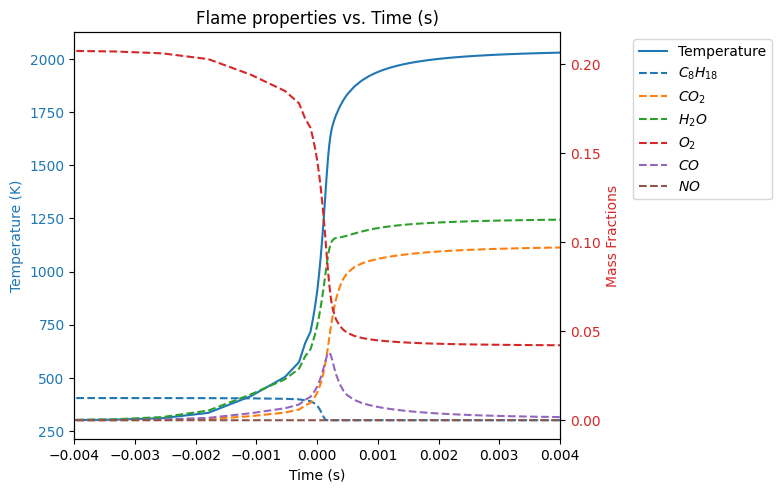

In [27]:
# Extract concentration data
X_C8H18 = flame.X[63]
X_O2 = flame.X[3]
X_CO = flame.X[12]
X_NO = flame.X[104]
X_CO2 = flame.X[14]
X_H2O = flame.X[8]

fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.plot(actual_time_scale, flame.T,label="Temperature")

ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Mass Fractions', color='tab:red')
plt.plot(actual_time_scale, X_C8H18, label="$C_{8}H_{18}$",linestyle = '--')
plt.plot(actual_time_scale, X_CO2, label="$CO_{2}$",linestyle = '--')
plt.plot(actual_time_scale, X_H2O, label="$H_{2}O$",linestyle = '--')
plt.plot(actual_time_scale, X_O2, label="$O_{2}$",linestyle = '--')
plt.plot(actual_time_scale, X_CO, label="$CO$",linestyle = '--')
plt.plot(actual_time_scale, X_NO, label="$NO$",linestyle = '--')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Add legends
lines1, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.45, 1))
plt.xlim([-0.004, 0.004])

plt.title('Flame properties vs. Time (s)')
plt.show()

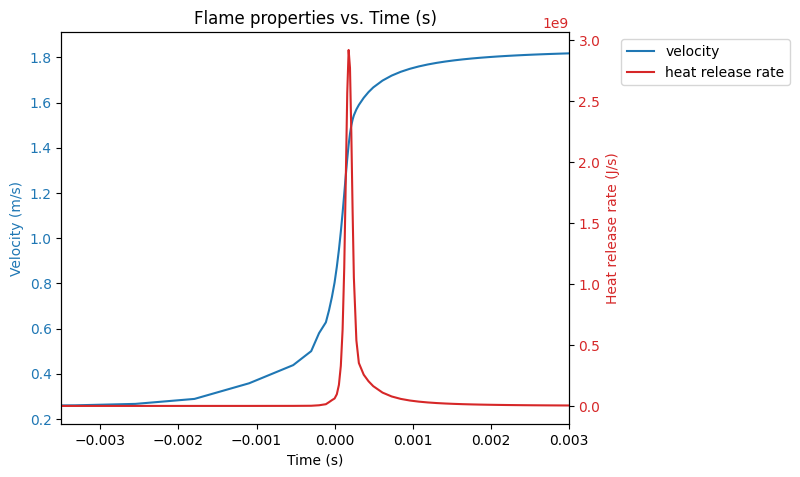

In [28]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Velocity (m/s)', color='tab:blue')
ax1.plot(actual_time_scale, velocity,label="velocity")

ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Heat release rate (J/s)', color='tab:red')
plt.plot(actual_time_scale, flame.heat_release_rate,color='tab:red',label = "heat release rate")
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Add legends
lines1, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.45, 1))
plt.xlim([-0.0035, 0.003])

plt.title('Flame properties vs. Time (s)')
plt.show()

Question 5 - Temperature and Heat release rate 

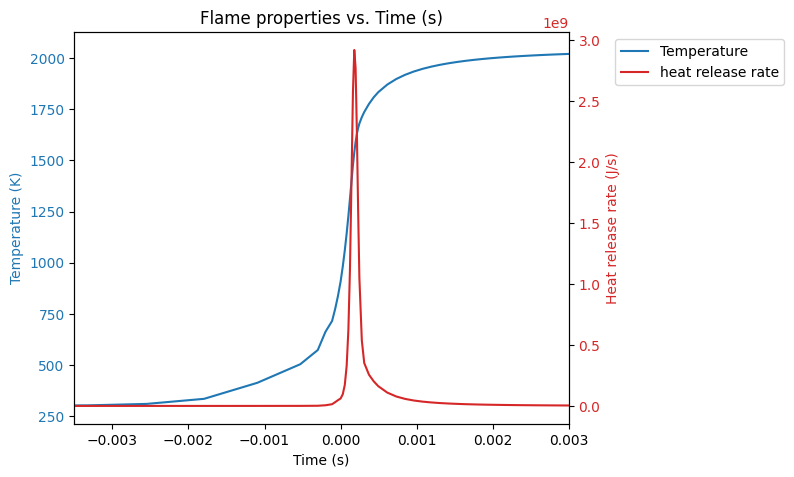

In [29]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Temperature (K)', color='tab:blue')
ax1.plot(actual_time_scale, flame.T,label="Temperature")

ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Heat release rate (J/s)', color='tab:red')
plt.plot(actual_time_scale, flame.heat_release_rate,color='tab:red',label = "heat release rate")
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()

# Add legends
lines1, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels + labels2, loc='upper right', bbox_to_anchor=(1.45, 1))
plt.xlim([-0.0035, 0.003])

plt.title('Flame properties vs. Time (s)')
plt.show()

Question 6 - Species production rates

In [30]:
# Specify the species for which you want to calculate production rates
species_of_interest = ['IXC8H18', 'O2', 'CO', 'NO', 'CO2', 'H2O']  # Replace with your desired species

# Calculate the production rates
production_rates = flame.net_production_rates  # All species' production rates
production_rates_species = {species: production_rates[gas.species_index(species)] for species in species_of_interest}

(-0.0005, 0.001)

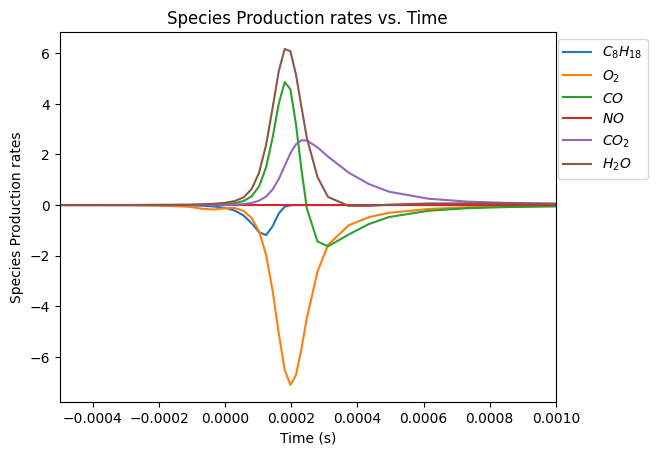

In [31]:
# Create a plot

plt.plot(actual_time_scale, production_rates_species['IXC8H18'], label="$C_{8}H_{18}$")
plt.plot(actual_time_scale, production_rates_species['O2'], label="$O_{2}$")
plt.plot(actual_time_scale, production_rates_species['CO'], label="$CO$")
plt.plot(actual_time_scale, production_rates_species['NO'], label="$NO$")
plt.plot(actual_time_scale, production_rates_species['CO2'], label="$CO_{2}$")
plt.plot(actual_time_scale, production_rates_species['H2O'], label="$H_{2}O$")

plt.xlabel("Time (s)")
plt.ylabel("Species Production rates");
plt.title('Species Production rates vs. Time')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xlim([-0.0005, 0.001])

Question 8 - Varying the phi - 0.6 , 0.65, 0.7

In [10]:
Phi = [0.6,0.65,0.7]
NO_Y_values = []
CO_Y_values = []
final_temp_values = []
grid_values = []
max_heat_release_rate = []
flame_velocity_values = []

In [11]:
i = 1
for i in range(len(Phi)):
    temp_values = []
    CO_values = []
    NO_values = []
    grid_points = []
    heat_release = []
    velocity_values = []
    # Set up the Cantera flame configuration
    #gas = ct.Solution('gri30.yaml')  # Replace 'your_mechanism.cti' with the actual mechanism file
    gas = ct.Solution('Jerzembeck.yaml')
    phi = Phi[i]
    P = 1.0 * ct.one_atm
    Tin = 300.0
    width = 0.02  # Adjust the domain width as needed
    initial_grid = np.linspace(0, width, 100)

    # Create a stoichiometric CH4/Air premixed mixture
    #gas.set_equivalence_ratio(phi, "CH4", {"O2": 1.0, "N2": 3.76})
    gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:12.5, N2:47')
    gas.TP = Tin, P
    flame = ct.FreeFlame(gas, grid=initial_grid)
    # Run the flame simulation
    flame.solve(loglevel=1, auto=True)
    temp_values.append(flame.T)
    CO_values.append(flame.X[12])
    NO_values.append(flame.X[104])
    grid_points.append(flame.grid)
    heat_release.append(flame.heat_release_rate)
    velocity_values.append(flame.velocity)
    
    final_temp_values.append(temp_values[0])
    CO_Y_values.append(CO_values[0])
    NO_Y_values.append(NO_values[0])
    grid_values.append(grid_points[0])
    max_heat_release_rate.append(heat_release[0])
    flame_velocity_values.append(velocity_values[0])


*********** Solving on 100 point grid with energy equation enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.005e-06       6.09
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.041e-05      6.071
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     7.697e-05      5.685
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002598      5.079
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001973      4.542
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00749      3.348
Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
grid refinement

In [56]:
print(len(grid_values[0]))
print(len(final_temp_values[0]))
print(len(CO_Y_values[0]))
print(len(NO_Y_values[0]))
print(flame.thermal_conductivity)

115
115
115
115
[0.0245636  0.0245636  0.0245636  0.0245636  0.0245636  0.0245636
 0.0245636  0.0245636  0.0245636  0.0245636  0.0245636  0.0245636
 0.0245636  0.02456361 0.02456362 0.02456363 0.02456366 0.0245637
 0.02456376 0.02456388 0.02456407 0.02456439 0.02456492 0.02456583
 0.02456737 0.02457006 0.02457491 0.02458436 0.02460499 0.0246571
 0.02480846 0.02529307 0.02690401 0.03196193 0.03783974 0.04233327
 0.04808176 0.05147848 0.05522393 0.05930277 0.06369702 0.06838736
 0.07334073 0.07850172 0.08378027 0.08903404 0.09405769 0.09860229
 0.10245046 0.1055054  0.10781698 0.10953853 0.11085218 0.11272724
 0.11416981 0.11634878 0.1179793  0.11922868 0.12092781 0.12210136
 0.12296775 0.12363875 0.12417598 0.12461643 0.12498399 0.12529507
 0.1255614  0.12579167 0.12599246 0.12616885 0.12632483 0.12646356
 0.12658762 0.12669909 0.12679967 0.12689079 0.12697364 0.12704922
 0.12711838 0.12718184 0.12724021 0.12729405 0.1273438  0.12738988
 0.12743264 0.12747239 0.1275094  0.12754392 0.127

In [34]:
'''
time_scale_05 = np.zeros(len(grid_values[0]))
time_scale_65 = np.zeros(len(grid_values[1]))
time_scale_7 = np.zeros(len(grid_values[2]))
#time_scale = []
# Calculate the time scale
def calculate_time_scale(grid, velocity): 
    for j in range(1,len(grid_values[0])-1):
        delta_x = (grid[j+1]-grid[j-1])/2
        vel = velocity[j]
        time_scale[j] = delta_x/vel
        #time_scale.append(delta_x/vel)
    return time_scale

time_scale_05 = calculate_time_scale(grid_values[0], flame_velocity_values[0])
time_scale_05[0] = (grid_values[0][0]-grid_values[0][1])/flame_velocity_values[0][0]
time_scale_05[-1] = (grid_values[0][-2]-grid_values[0][-1])/flame_velocity_values[0][-1]
#length_flame = len(flame.grid)
#print(np.diff(flame.grid))
#print(len(time_scale))
'''

new_grid_06 = np.zeros(len(grid_values[0]))
new_grid_65 = np.zeros(len(grid_values[1]))
new_grid_7 = np.zeros(len(grid_values[2]))
time_scale_06 = np.zeros(len(grid_values[0]))
time_scale_65 = np.zeros(len(grid_values[1]))
time_scale_7 = np.zeros(len(grid_values[2]))
i = 1
for i in range(1,len(grid_values[0])):
    new_grid_06[i] = grid_values[0][i]- grid_values[0][i-1]
    time_scale_06[i] = new_grid_06[i]/flame_velocity_values[0][i]
    new_grid_65[i] = grid_values[1][i]- grid_values[1][i-1]
    time_scale_65[i] = new_grid_65[i]/flame_velocity_values[1][i]
    new_grid_7[i] = grid_values[2][i]- grid_values[2][i-1]
    time_scale_7[i] = new_grid_7[i]/flame_velocity_values[2][i]


# Find the position of maximum heat release
max_heat_release_idx_06 = np.argmax(max_heat_release_rate[0])
max_heat_release_idx_065 = np.argmax(max_heat_release_rate[1])
max_heat_release_idx_7 = np.argmax(max_heat_release_rate[2])

print(max_heat_release_idx_06)
print(max_heat_release_idx_065)
print(max_heat_release_idx_7)

# to store the changed time scale t = 0 at maximum heat release
actual_time_scale_06 = np.zeros(len(time_scale_06))
actual_time_scale_65 = np.zeros(len(time_scale_65))
actual_time_scale_7 = np.zeros(len(time_scale_7))

def calculate_time_scale(time_scale, index):
    time_scale_a = np.zeros(len(time_scale))
    i = 1
    for i in range(index,len(time_scale)):
        time_scale_a[index-1] = 0
        time_scale_a[i] = time_scale[i] + time_scale_a[i-1]
    for i in range(index-2,-1,-1):
        time_scale_a[index-1] = 0
        time_scale_a[i] = time_scale_a[i+1] - time_scale[i] 
    return time_scale_a             

actual_time_scale_06 = calculate_time_scale(time_scale_06,max_heat_release_idx_06)
actual_time_scale_65 = calculate_time_scale(time_scale_65,max_heat_release_idx_065)
actual_time_scale_7 = calculate_time_scale(time_scale_7,max_heat_release_idx_7)

'''
i = 1
for i in range(max_heat_release_idx_06,len(time_scale_06)):
    actual_time_scale_06[max_heat_release_idx_06-1] =  0
    actual_time_scale_06[i] =  time_scale[i] + actual_time_scale[i-1]
for i in range(39,-1,-1):
    actual_time_scale[40] =  0
    actual_time_scale[i] =  actual_time_scale[i+1] - time_scale[i]
'''

48
48
49


'\ni = 1\nfor i in range(max_heat_release_idx_06,len(time_scale_06)):\n    actual_time_scale_06[max_heat_release_idx_06-1] =  0\n    actual_time_scale_06[i] =  time_scale[i] + actual_time_scale[i-1]\nfor i in range(39,-1,-1):\n    actual_time_scale[40] =  0\n    actual_time_scale[i] =  actual_time_scale[i+1] - time_scale[i]\n'

(-0.01, 0.01)

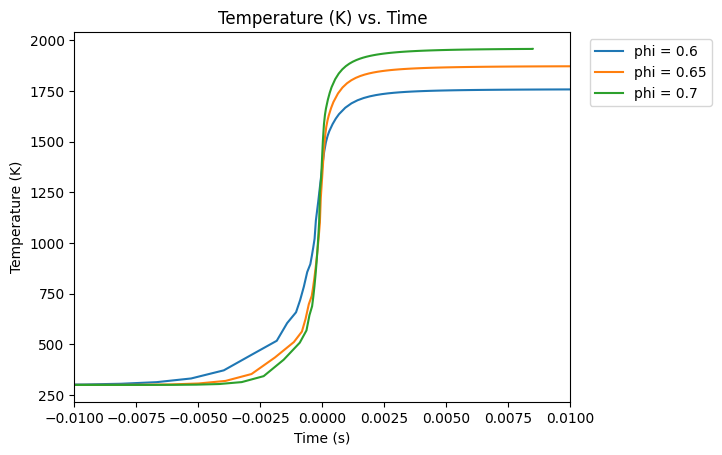

In [41]:
# Create a plot

plt.figure()
plt.plot(actual_time_scale_06, final_temp_values[0], label="phi = 0.6")
plt.plot(actual_time_scale_65, final_temp_values[1], label="phi = 0.65")
plt.plot(actual_time_scale_7, final_temp_values[2], label="phi = 0.7")


plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.title('Temperature (K) vs. Time')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim([-0.01, 0.01])

(-0.008, 0.0075)

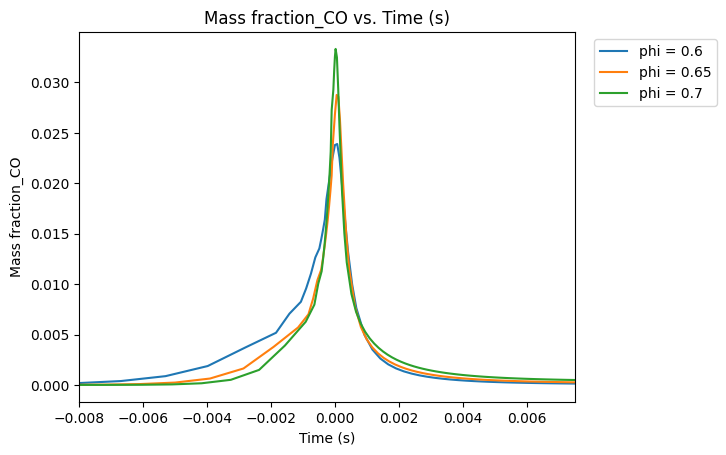

In [46]:
# Create a plot

plt.figure()
plt.plot(actual_time_scale_06, CO_Y_values[0], label="phi = 0.6")
plt.plot(actual_time_scale_65, CO_Y_values[1], label="phi = 0.65")
plt.plot(actual_time_scale_7, CO_Y_values[2], label="phi = 0.7")


plt.xlabel("Time (s)")
plt.ylabel("Mass fraction_CO")
plt.title('Mass fraction_CO vs. Time (s)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim([-0.008, 0.0075])

(-0.008, 0.01)

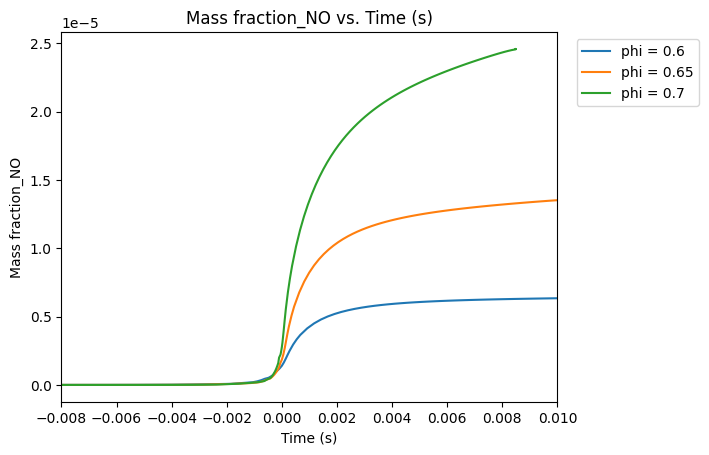

In [50]:
# Create a plot

plt.figure()
plt.plot(actual_time_scale_06, NO_Y_values[0], label="phi = 0.6")
plt.plot(actual_time_scale_65, NO_Y_values[1], label="phi = 0.65")
plt.plot(actual_time_scale_7, NO_Y_values[2], label="phi = 0.7")


plt.xlabel("Time (s)")
plt.ylabel("Mass fraction_NO")
plt.title('Mass fraction_NO vs. Time (s)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlim([-0.008, 0.01])

Question- 9, varying phi from 0.5 to 1.5

In [ ]:
Phi = np.arange(0.5,1.5,0.1)
velocity_flame_Q9 = []
velocity_values_Q9 = []
heat_release_values_Q9 = []
print(Phi)

In [ ]:
j = 1
for k in range(len(Phi)):
    velocity_points = []
    heat_release_points = []
    
    j = j+1
    # Set up the Cantera flame configuration
    #gas = ct.Solution('gri30.yaml')  # Replace 'your_mechanism.cti' with the actual mechanism file
    gas = ct.Solution('Jerzembeck.yaml')
    phi = Phi[k]
    P = 1.0 * ct.one_atm
    Tin = 300.0
    width = 0.02  # Adjust the domain width as needed
    initial_grid = np.linspace(0, width, 100)

    # Create a stoichiometric CH4/Air premixed mixture
    #gas.set_equivalence_ratio(phi, "CH4", {"O2": 1.0, "N2": 3.76})
    gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:12.5, N2:47')
    gas.TP = Tin, P
    flame = ct.FreeFlame(gas, grid=initial_grid)
    # Run the flame simulation
    flame.solve(loglevel=1, auto=True)
    
    velocity_points.append(flame.velocity)
    heat_release_points.append(flame.heat_release_rate)
    Su0 = flame.velocity[0]
    
    print(f"Flame Speed is: {Su0 * 100:.2f} cm/s")
    velocity_flame_Q9.append(Su0)
    velocity_values_Q9.append(velocity_points[0])
    heat_release_values_Q9.append(heat_release_points[0])

In [59]:
print(velocity_flame_Q9)
print(Phi)

[0.059043949789809445, 0.13819797037757764, 0.21789358895757258, 0.29743369582734147, 0.34754241667144903, 0.37903488000144164, 0.383351100840101, 0.33372649370609314, 0.26909312937140045, 0.1664432315319703]
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4]


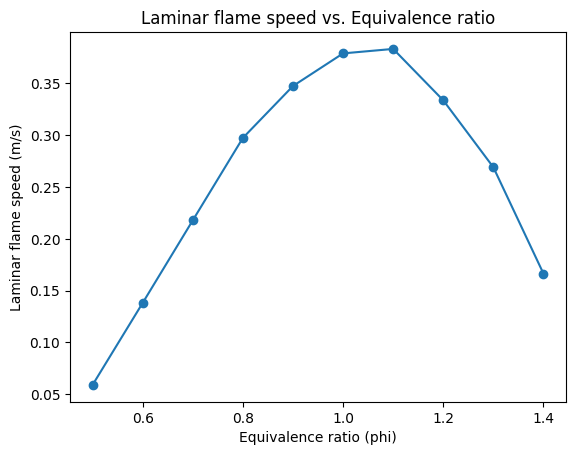

In [60]:
plt.figure()
plt.plot(Phi, velocity_flame_Q9,"-o")
plt.xlabel("Equivalence ratio (phi)")
plt.ylabel("Laminar flame speed (m/s)");
plt.title('Laminar flame speed vs. Equivalence ratio')
plt.show()

Question- 10, varying initial pressure from 1 to 16

In [19]:
P_initial = [1,2,4,8,16]
velocity_flame_Q10 = []
density_flame_values = []
thermal_conductivity_values = []
specific_heat_values = []
velocity_values_Q10 = []
heat_release_values_Q10 = []

In [20]:
j = 1
for l in range(len(P_initial)):
    density_points = []
    thermal_conductivity_points = []
    specific_heat_points = []
    velocity_points = []
    heat_release_points = []
    
    j = j+1
    # Set up the Cantera flame configuration
    #gas = ct.Solution('gri30.yaml')  # Replace 'your_mechanism.cti' with the actual mechanism file
    gas = ct.Solution('Jerzembeck.yaml')
    phi = 0.6
    P = P_initial[l] * ct.one_atm
    Tin = 600
    width = 0.02  # Adjust the domain width as needed
    initial_grid = np.linspace(0, width, 100)

    # Create a stoichiometric CH4/Air premixed mixture
    #gas.set_equivalence_ratio(phi, "CH4", {"O2": 1.0, "N2": 3.76})
    gas.set_equivalence_ratio(phi, 'IXC8H18', 'O2:12.5, N2:47')
    gas.TP = Tin, P
    flame = ct.FreeFlame(gas, grid=initial_grid)
    # Run the flame simulation
    flame.solve(loglevel=1, auto=True)
    density_points.append(flame.density_mass)
    thermal_conductivity_points.append(flame.thermal_conductivity)
    specific_heat_points.append(flame.cp_mass)
    velocity_points.append(flame.velocity)
    heat_release_points.append(flame.heat_release_rate)
    
    Su0 = flame.velocity[0]
    
    print(f"Flame Speed is: {Su0 * 100:.2f} cm/s")
    velocity_flame_Q10.append(Su0)
    density_flame_values.append(density_points[0])
    thermal_conductivity_values.append(thermal_conductivity_points[0])
    specific_heat_values.append(specific_heat_points[0])
    velocity_values_Q10.append(velocity_points[0])
    heat_release_values_Q10.append(heat_release_points[0])


*********** Solving on 100 point grid with energy equation enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.438e-06      6.707
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.424e-05      6.465
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.802e-05      6.293
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.055e-05      6.074
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002053      4.906
Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

...............

Attempt Newton solution of steady-state problem...    success.

Problem solved on [114] point grid(s).

..............................................................................
no new points needed in flame
Flame Speed is: 57.12 cm/s

*********** Solving on 100 point grid with energy equation enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.109e-06      7.214
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.068e-05      6.736
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.014e-05      6.451
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.622e-06      6.476
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.425e-06      7.167
Attempt Newton solution of steady-state problem...    failure. 
T

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.909e-05      5.381
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001002      3.981
Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 33 34 35 
    to resolve AXC5H10 C2H C2H2 C2H3 C2H3CHO C2H4 C2H5O2 C2H6 C3H2 C3H3 C3H4XA 

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.625e-06      6.633
Attempt Newton solution of steady-state problem...    success.

Problem solved on [103] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 34 35 36 
    to resolve AXC5H10 C2H C2H2 C2H3 C2H3CHO C2H4 C2H5O2 C2H6 C3H2 C3H3 C3H4XA C3H4XP C3H5XA C3H5XT C3H6 C3H8 C4H8X1 CH2 CH2CCH2OH CH2CO CH2O CH2OH CH3 CH3CHO CH3COCH2 CH3COCH3 CH3O CH3O2 CH3O2H CH3OH CH4 CO CO2 CXC8H17 H H2O H2O2 HCCO HCN HCNO HCO HNCO HO2 HOCHO IC4H8O2HXT IXC3H5CHO IXC3H5CO IXC3H6CO IXC3H7 IXC3H7O2 IXC4H10 IXC4H6OH IXC4H7 IXC4H7O IXC4H7OH IXC4H8 IXC4H9 IXC4H9O2 IXC5H9 IXC8H18 N2 N2O NCO NEOXC5H11 NO NO2 NXC3H7O2 O O2 OH T TXC4H9 TXC4H9O2 XXC7H13 YXC7H14 velocity 
####################################################################

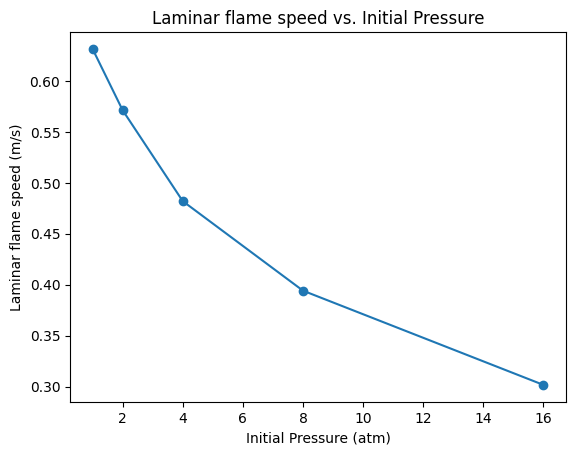

In [21]:
plt.figure()
plt.plot(P_initial, velocity_flame_Q10,"-o")
plt.xlabel("Initial Pressure (atm)")
plt.ylabel("Laminar flame speed (m/s)");
plt.title('Laminar flame speed vs. Initial Pressure')
plt.show()

In [22]:
flame_thickness_values = []
'''
#print(len(density_flame_values[0]))
for n in range(len(velocity_flame_Q10)):
    flame_thickness = []
    for m in range(0,len(density_flame_values[0])):
        laminar_thickness = thermal_conductivity_values[n][m]/\
        (density_flame_values[n][m]*velocity_values_Q10[n][m]*specific_heat_values[n][m])
        flame_thickness.append(laminar_thickness)
    flame_thickness_values.append(flame_thickness)
'''
for n in range(len(velocity_flame_Q10)):
    laminar_thickness = thermal_conductivity_values[n][0]/\
        (density_flame_values[n][0]*velocity_values_Q10[n][0]*specific_heat_values[n][0])
    flame_thickness_values.append(laminar_thickness*1000)

In [23]:
flame_thickness_values_test = []
for n in range(len(velocity_flame_Q10)):
    laminar_thickness_test = np.mean(thermal_conductivity_values[n])/\
        (np.mean(density_flame_values[n])*np.mean(velocity_values_Q10[n])*np.mean(specific_heat_values[n]))
    flame_thickness_values_test.append(laminar_thickness_test*1000)
print(flame_thickness_values_test)

[0.1391107421412993, 0.07812907656219849, 0.046378313023988996, 0.028375506861429044, 0.018584812635420327]


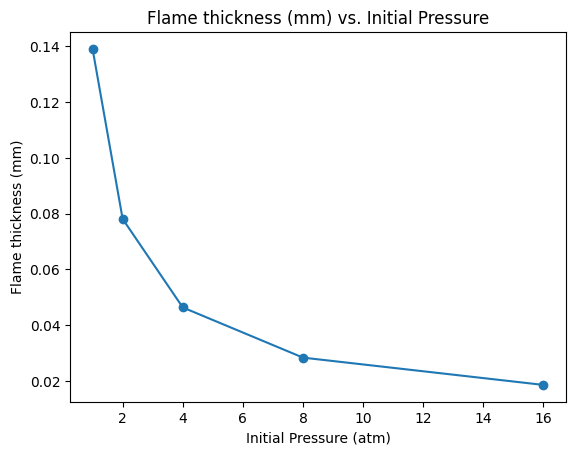

In [26]:
plt.figure()
plt.plot(P_initial,flame_thickness_values_test,"-o")
plt.xlabel("Initial Pressure (atm)")
plt.ylabel("Flame thickness (mm)");
plt.title('Flame thickness (mm) vs. Initial Pressure')
plt.show()

In [25]:
print(density_flame_values[0][0])

0.603304852577955
